# Machine Learning

In [7]:
import sys
sys.path.insert(0,'..')
from datastore import DataStore
from ml import Learner

Initialize data store object, then learner, automatically loading feature file produced by featurizer, along with file of data labels, and merging features to labels.

In [2]:
datastore = DataStore(cfg_dir='../configs/config.yml')
learner = Learner(datastore=datastore, clean_folders=True)

Number of observations with features: 1000 (1000 unique)
Number of observations with labels: 50 (50 unique)
Number of matched observations: 50 (50 unique)


Experiment quickly with untuned models to get a sense of accuracy. Lasso, Ridge, random forest, and gradient boosting models are implemented natively, other models can be implemented by hand.

In [3]:
lasso_scores = learner.untuned_model('lasso')
randomforest_scores = learner.untuned_model('randomforest')
print('LASSO', lasso_scores)
print('Random Forest', randomforest_scores)

LASSO {'train_r2': '1.00 (0.00)', 'test_r2': '-0.19 (0.48)', 'train_rmse': '6.65 (-3.02)', 'test_rmse': '15665.32 (-1859.46)'}
Random Forest {'train_r2': '0.84 (0.01)', 'test_r2': '-0.03 (0.12)', 'train_rmse': '6199.76 (-343.95)', 'test_rmse': '14980.38 (-1532.48)'}


Fine-tune a gradient boosting model, tuning hyperparameters over cross validation, and produce predictions for all labeled observations out-of-sample over cross-validation. Also generate predictions for all subscribers in the feature dataset. 

In [4]:
gradientboosting_scores = learner.tuned_model('gradientboosting')
print('Gradient Boosting (Tuned)', gradientboosting_scores)
learner.oos_predictions('gradientboosting', kind='tuned')
learner.population_predictions('gradientboosting', kind='tuned')

Gradient Boosting (Tuned) {'train_r2': '0.81 (0.02)', 'test_r2': '0.22 (0.10)', 'train_rmse': '6757.55 (-453.63)', 'test_rmse': '13075.51 (-1723.70)'}


,name,predicted
0,dsBHAdXrrk,67285.537798
1,JGPCbfDGes,67468.627104
2,dYwshzRseD,87417.085027
3,ygMEXUQDbn,80442.722524
4,YtvkGlMWwe,72094.810880
...,...,...
5,amzyXHglBx,84262.615146
6,zZkqaZFAtz,80657.589908
7,uXZrufHOmE,85309.191082
8,dJSvXqUVSY,76409.277028


Evaluate the model’s accuracy. Produce a scatterplot of true vs. predicted values with a LOESS fit and a bar plot of the most important features. Generate a table showing the targeting accuracy, precision, and recall of the predictions for nine hypothetical targeting scenarios (targeting between 10% and 90% of the population). 

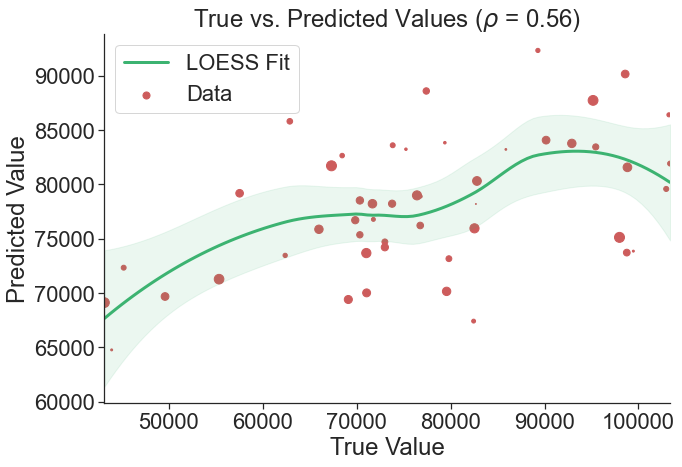

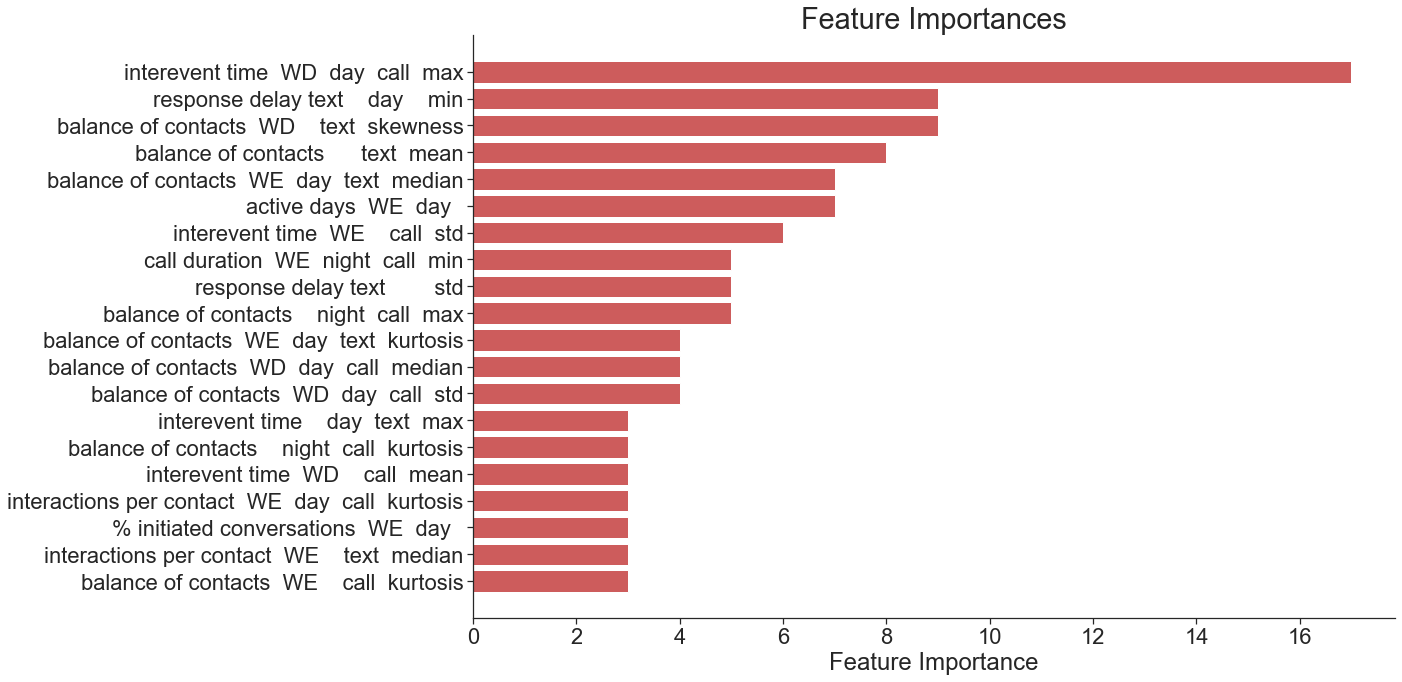

,Proportion of Population Targeted,Pearson,Spearman,AUC,Accuracy,Precision,Recall
0,10%,0.56,0.5,0.73,93%,65%,65%
1,20%,0.56,0.5,0.73,81%,53%,53%
2,30%,0.56,0.5,0.73,71%,52%,52%
3,40%,0.56,0.5,0.73,67%,59%,59%
4,50%,0.56,0.5,0.73,65%,65%,65%
5,60%,0.56,0.5,0.73,69%,74%,74%
6,70%,0.56,0.5,0.73,79%,85%,85%
7,80%,0.56,0.5,0.73,75%,84%,84%
8,90%,0.56,0.5,0.73,84%,91%,91%


In [6]:
learner.scatter_plot('gradientboosting', kind='tuned')
learner.feature_importances_plot('gradientboosting', kind='tuned')
learner.targeting_table('gradientboosting', kind='tuned')